# Scraping Twitter - tweets with #LUNA

In [2]:
import json
PATH = "C:/Users/Rnowa/Documents/UX_UE_DASH_WEBAPP_WEBSCRAPING/twitter_data/LUNA.json"

In [6]:
from twitter_scraper_selenium import scrap_keyword

LUNA = scrap_keyword(
    keyword="LUNA", output_format="json",
    browser="firefox", tweets_count=1000, until="2022-05-15", since="2022-04-01")

[WDM] - Driver [C:\Users\Rnowa\.wdm\drivers\geckodriver\win64\v0.31.0\geckodriver.exe] found in cache


In [2]:
LUNA_json = json.loads(LUNA)
LUNA_json = json.dumps(LUNA_json, indent=4)

with open(PATH, 'w') as outfile:
    outfile.write(LUNA_json)

NameError: name 'LUNA' is not defined

In [3]:
tweets = {}
with open(PATH) as fjson:
    tweets = json.load(fjson)

In [4]:
tweets_content = []
for tweet in tweets:
    tweets_content.append(tweets[tweet]["content"])

In [5]:
tweets_content

['I just sold some $luna time to rally 2 The Moon #lunaterra ',
 'LUNA comeback?',
 'Same boat as you and I 100% agree. We knew the risks with Luna and accepted them for upside.',
 'Wrapped LUNA Token na \n@Coinbase\n: https://coinbase.com/price/wrapped-luna-token?utm_campaign=rt_i_m_w_m_acq_ugc_soc_0_asset&utm_source=ugc&utm_platform=Android…',
 'Cómo que Luna no es una criptomoneda? ',
 'Luna should burn 99% of available supply \n@stablekwon',
 'What is your soothing?\n#LUNA \n#Luna',
 'Big opportunity is coming for you $luna \n#lunaterra  #Terra #Terra_Luna #LUNAtics',
 'Soylendigi gibi $luna vakfi buyuk rakamlarla btcleri borsalara gonderdiyse, bu borsalar bu btcleri kime satip lunayi canlandiracak. Bu yukselis dususun habercisi ise isimiz zor',
 '@elonmusk\n is this true? Save $LUNA crypto.',
 'Terra luna',
 "Note: Luna is too. \n\n(I'm legally allowed to make this joke because I lost money. It's not cultural appropriation.)",
 'Luna destroyed everyone and took life of people stay

# Data preparation pipeline
1. Remove '\n', make all words lower-case
2. Filter the tweets only for english language
    * https://stackoverflow.com/questions/38488387/twitter-dataset-filtering-for-only-english-language-text-using-python

## 1. Language detection

In [6]:
from langdetect import detect

In [7]:
en_tweets = []

for tweet in tweets_content:
    try:
        if detect(tweet) == 'en':
            en_tweets.append(tweet)
    except:
        continue

In [8]:
en_tweets

['I just sold some $luna time to rally 2 The Moon #lunaterra ',
 'LUNA comeback?',
 'Same boat as you and I 100% agree. We knew the risks with Luna and accepted them for upside.',
 'Wrapped LUNA Token na \n@Coinbase\n: https://coinbase.com/price/wrapped-luna-token?utm_campaign=rt_i_m_w_m_acq_ugc_soc_0_asset&utm_source=ugc&utm_platform=Android…',
 'Luna should burn 99% of available supply \n@stablekwon',
 'What is your soothing?\n#LUNA \n#Luna',
 '@elonmusk\n is this true? Save $LUNA crypto.',
 "Note: Luna is too. \n\n(I'm legally allowed to make this joke because I lost money. It's not cultural appropriation.)",
 'Luna destroyed everyone and took life of people stay away from Luna they did scam buy minting more coins',
 '#congrats to bonus weekend winner \n@Yunsik253\n  again who will recive a #nft from \n@BullRunCrew\n  and 1 from \n@SRM_MONG\n  super happy  #goodvibes #crofam #shibarmy #luna #bayc #brc #madharesociety #thetrip #loadedlions #psycomollies #tingcoseplay',
 'i can hear t

In [9]:
len(en_tweets)

461

## 2. Removing non-relevant strings and other formatting

In [10]:
clean_tweets = []
for tweet in en_tweets:
    clean_tweets.append(tweet.lower())

In [11]:
import re

In [12]:
for i in range(len(clean_tweets)):
    # removing '@' and '#'
    clean_tweets[i] = re.sub("@[A-Za-z0-9_]+","", clean_tweets[i])
    clean_tweets[i] = re.sub("#[A-Za-z0-9_]+","", clean_tweets[i])
    # removing links
    clean_tweets[i] = re.sub(r"http\S+", "", clean_tweets[i])
    clean_tweets[i] = re.sub(r"www.\S+", "", clean_tweets[i])
    # removing escape sequences
    clean_tweets[i] = clean_tweets[i].replace('\n', '')
    # remove period, comma, exclamation mark, question mark
    clean_tweets[i] = re.sub('[()!?]', ' ', clean_tweets[i])
    clean_tweets[i] = re.sub('\[.*?\]',' ', clean_tweets[i])
    # remove non-alphanumeric characters
    clean_tweets[i] = re.sub("[^a-z0-9]"," ", clean_tweets[i])
    # remove cryptowallet adresses
    clean_tweets[i] = re.sub(r"0x\S+", "", clean_tweets[i])
    clean_tweets[i] = re.sub(r"terra1\S+", "", clean_tweets[i])
    clean_tweets[i] = re.sub(r"lunabinanceterra1\S+", "", clean_tweets[i])

In [13]:
clean_tweets

['i just sold some  luna time to rally 2 the moon  ',
 'luna comeback ',
 'same boat as you and i 100  agree  we knew the risks with luna and accepted them for upside ',
 'wrapped luna token na   ',
 'luna should burn 99  of available supply ',
 'what is your soothing  ',
 ' is this true  save  luna crypto ',
 'note  luna is too   i m legally allowed to make this joke because i lost money  it s not cultural appropriation  ',
 'luna destroyed everyone and took life of people stay away from luna they did scam buy minting more coins',
 ' to bonus weekend winner   again who will recive a  from   and 1 from   super happy            ',
 'i can hear the new name now  luna classic lunac ',
 '    luna      erc20    usdt   erc20    busd',
 'thanks facebook  but i don t think anyone likes  ',
 'luna come back we believe at youuuu       ',
 ' lunai noticed it dipped a bit so i bought some   ',
 'necessary arrangements are ready elon what is her favorite thing of course pump terra luna exactly what

# Dataset inspection

In [14]:
import nltk
nltk.download([
        "names",
        "stopwords",
        "state_union",
        "twitter_samples",
        "movie_reviews",
        "averaged_perceptron_tagger",
        "vader_lexicon",
         "punkt",
    ])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Rnowa\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rnowa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Rnowa\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Rnowa\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Rnowa\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rnowa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up

True

In [15]:
tokens = []
token = []
for tweet in clean_tweets:
    token = nltk.word_tokenize(tweet)
    tokens.extend(token)

print(tokens)

['i', 'just', 'sold', 'some', 'luna', 'time', 'to', 'rally', '2', 'the', 'moon', 'luna', 'comeback', 'same', 'boat', 'as', 'you', 'and', 'i', '100', 'agree', 'we', 'knew', 'the', 'risks', 'with', 'luna', 'and', 'accepted', 'them', 'for', 'upside', 'wrapped', 'luna', 'token', 'na', 'luna', 'should', 'burn', '99', 'of', 'available', 'supply', 'what', 'is', 'your', 'soothing', 'is', 'this', 'true', 'save', 'luna', 'crypto', 'note', 'luna', 'is', 'too', 'i', 'm', 'legally', 'allowed', 'to', 'make', 'this', 'joke', 'because', 'i', 'lost', 'money', 'it', 's', 'not', 'cultural', 'appropriation', 'luna', 'destroyed', 'everyone', 'and', 'took', 'life', 'of', 'people', 'stay', 'away', 'from', 'luna', 'they', 'did', 'scam', 'buy', 'minting', 'more', 'coins', 'to', 'bonus', 'weekend', 'winner', 'again', 'who', 'will', 'recive', 'a', 'from', 'and', '1', 'from', 'super', 'happy', 'i', 'can', 'hear', 'the', 'new', 'name', 'now', 'luna', 'classic', 'lunac', 'luna', 'erc20', 'usdt', 'erc20', 'busd', 't

In [16]:
stopwords = nltk.corpus.stopwords.words("english")
tokens = [w for w in tokens if w.isalpha()]
tokens = [w for w in tokens if w not in stopwords]

In [17]:
tokens

['sold',
 'luna',
 'time',
 'rally',
 'moon',
 'luna',
 'comeback',
 'boat',
 'agree',
 'knew',
 'risks',
 'luna',
 'accepted',
 'upside',
 'wrapped',
 'luna',
 'token',
 'na',
 'luna',
 'burn',
 'available',
 'supply',
 'soothing',
 'true',
 'save',
 'luna',
 'crypto',
 'note',
 'luna',
 'legally',
 'allowed',
 'make',
 'joke',
 'lost',
 'money',
 'cultural',
 'appropriation',
 'luna',
 'destroyed',
 'everyone',
 'took',
 'life',
 'people',
 'stay',
 'away',
 'luna',
 'scam',
 'buy',
 'minting',
 'coins',
 'bonus',
 'weekend',
 'winner',
 'recive',
 'super',
 'happy',
 'hear',
 'new',
 'name',
 'luna',
 'classic',
 'lunac',
 'luna',
 'usdt',
 'busd',
 'thanks',
 'facebook',
 'think',
 'anyone',
 'likes',
 'luna',
 'come',
 'back',
 'believe',
 'youuuu',
 'lunai',
 'noticed',
 'dipped',
 'bit',
 'bought',
 'necessary',
 'arrangements',
 'ready',
 'elon',
 'favorite',
 'thing',
 'course',
 'pump',
 'terra',
 'luna',
 'exactly',
 'elon',
 'wants',
 'get',
 'ready',
 'rally',
 'starting',

# Further inspecting the data

In [18]:
fd = nltk.FreqDist(tokens)

In [19]:
fd.most_common(6)

[('luna', 429),
 ('price', 45),
 ('ust', 41),
 ('buy', 38),
 ('burn', 33),
 ('week', 33)]

In [20]:
#concordance?

# Sentiment analysis

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [22]:
pos_tweets = []
neg_tweets = []

for tweet in clean_tweets:
    score = {}
    score = sia.polarity_scores(tweet)
    if score['compound'] > 0:
        pos_tweets.append(tweet)
    elif score['compound'] <= 0:
        neg_tweets.append(tweet)

In [23]:
pos_tokens = []
neg_token = []
for tweet in pos_tweets:
    pos_token = nltk.word_tokenize(tweet)
    pos_tokens.extend(pos_token)
    
stopwords = nltk.corpus.stopwords.words("english")
pos_tokens = [w for w in pos_tokens if w.isalpha()]
pos_tokens = [w for w in pos_tokens if w not in stopwords]

In [24]:
fd_pos = nltk.FreqDist(pos_tokens)
pos_common_raw = fd_pos.most_common(50)

In [25]:
pos_common = [] 
for tweet in pos_common_raw[1:]:
    tweet = list(tweet)
    pos_common.append(tweet[0])

In [26]:
neg_tokens = []
neg_token = []
for tweet in neg_tweets:
    neg_token = nltk.word_tokenize(tweet)
    neg_tokens.extend(neg_token)
    
stopwords = nltk.corpus.stopwords.words("english")
neg_tokens = [w for w in neg_tokens if w.isalpha()]
neg_tokens = [w for w in neg_tokens if w not in stopwords]

In [27]:
fd_neg = nltk.FreqDist(neg_tokens)
neg_common_raw = fd_neg.most_common(50)

In [28]:
neg_common = [] 
for tweet in neg_common_raw[1:]:
    tweet = list(tweet)
    neg_common.append(tweet[0])

# Data visualization

## positive tweets

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font = "C:/Users/Rnowa/Documents/UX_UE_DASH_WEBAPP_WEBSCRAPING/Comfortaa/static/Comfortaa-Bold.ttf"

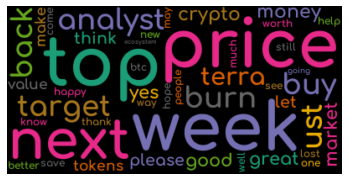

In [32]:
wordcloud_pos = WordCloud(max_font_size=80, max_words=500,
                          background_color="black",
                          font_path=font,
                         colormap='Dark2').generate(
                            str(pos_common).replace("'",""))
plt.figure()
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.savefig('C:/Users/Rnowa/Documents/UX_UE_DASH_WEBAPP_WEBSCRAPING/plots/pos.png')
plt.show()

## negative tweets

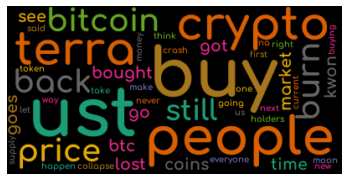

In [33]:
wordcloud_neg = WordCloud(max_font_size=80, max_words=500, 
                      background_color="black", 
                        font_path=font,
                         colormap='Dark2').generate(str(neg_common).replace("'",""))
plt.figure()
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.savefig('C:/Users/Rnowa/Documents/UX_UE_DASH_WEBAPP_WEBSCRAPING/plots/neg.png')
plt.show()

In [ ]:
PATH_READ_POS = "C:/Users/Rnowa/Documents/UX_UE_DASH_WEBAPP_WEBSCRAPING/pos_common.txt"
PATH_READ_NEG = "C:/Users/Rnowa/Documents/UX_UE_DASH_WEBAPP_WEBSCRAPING/neg_common.txt"

with open(PATH_READ_POS, 'w') as f:
    f.write(str(pos_common))
    
with open(PATH_READ_NEG, 'w') as f:
    f.write(str(neg_common))